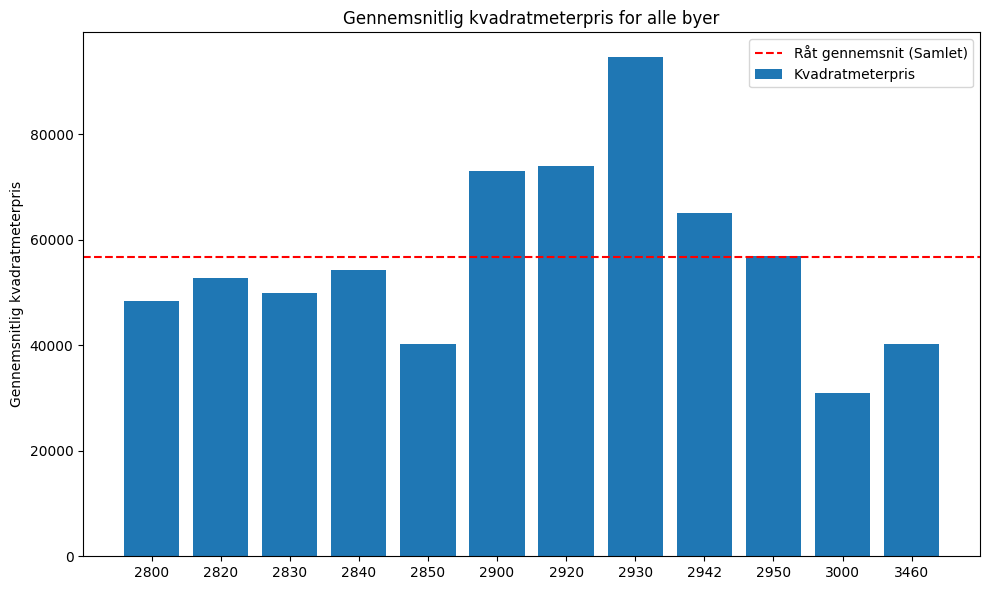

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for all 12 cities
avg_all_cities = []

for df in dataframes:
    average = df['Squaremeter price'].mean()
    avg_all_cities.append(average)

# Calculate raw average (does not take into account how many for sale in each city)
avg_raw = sum(avg_all_cities) / len(avg_all_cities)


# Plots
plt.figure(figsize=(10, 6))
plt.bar(cities, avg_all_cities, label='Kvadratmeterpris')
plt.axhline(y=avg_raw, color='red', linestyle='--', label='Råt gennemsnit (Samlet)')
plt.ylabel('Gennemsnitlig kvadratmeterpris')
plt.title('Gennemsnitlig kvadratmeterpris for alle byer')
plt.legend()

plt.tight_layout()
plt.show()


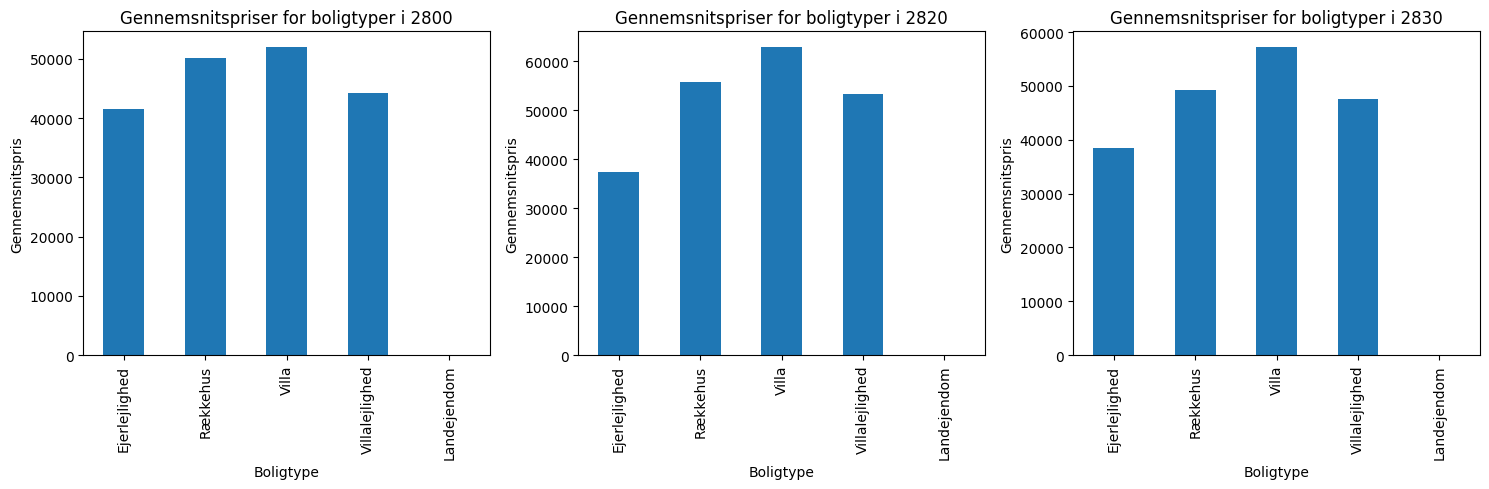

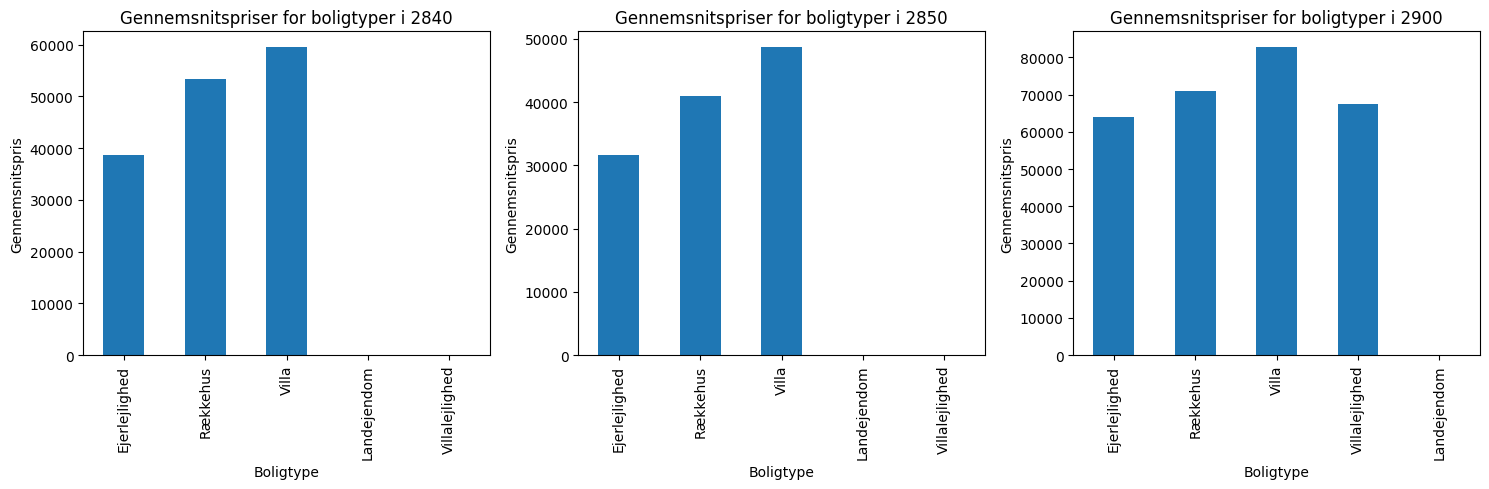

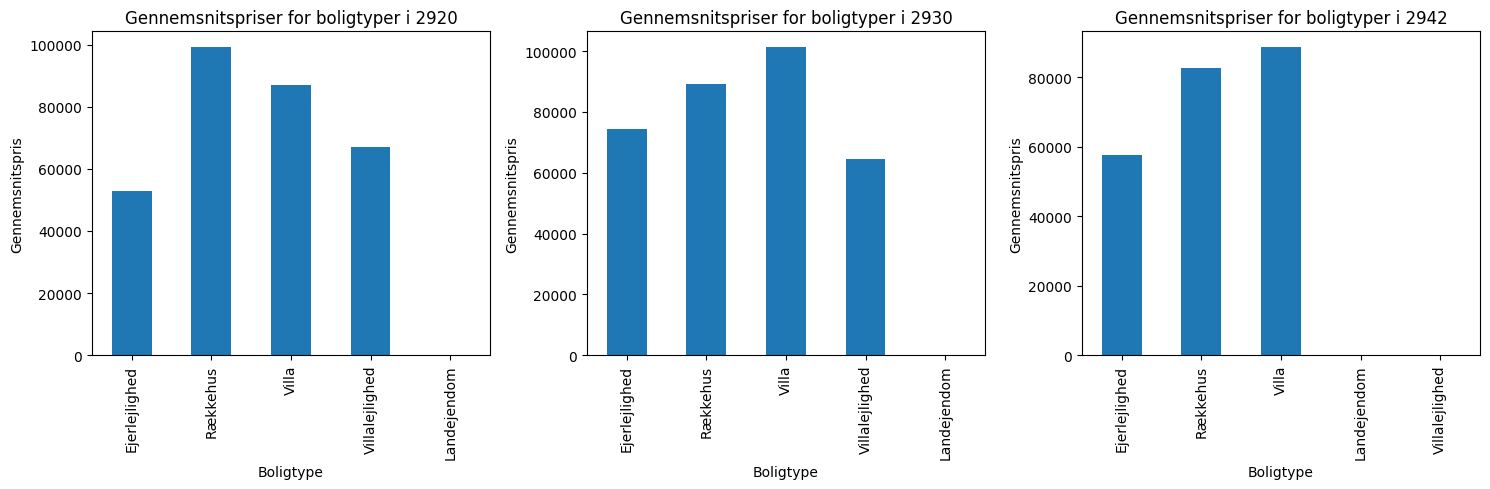

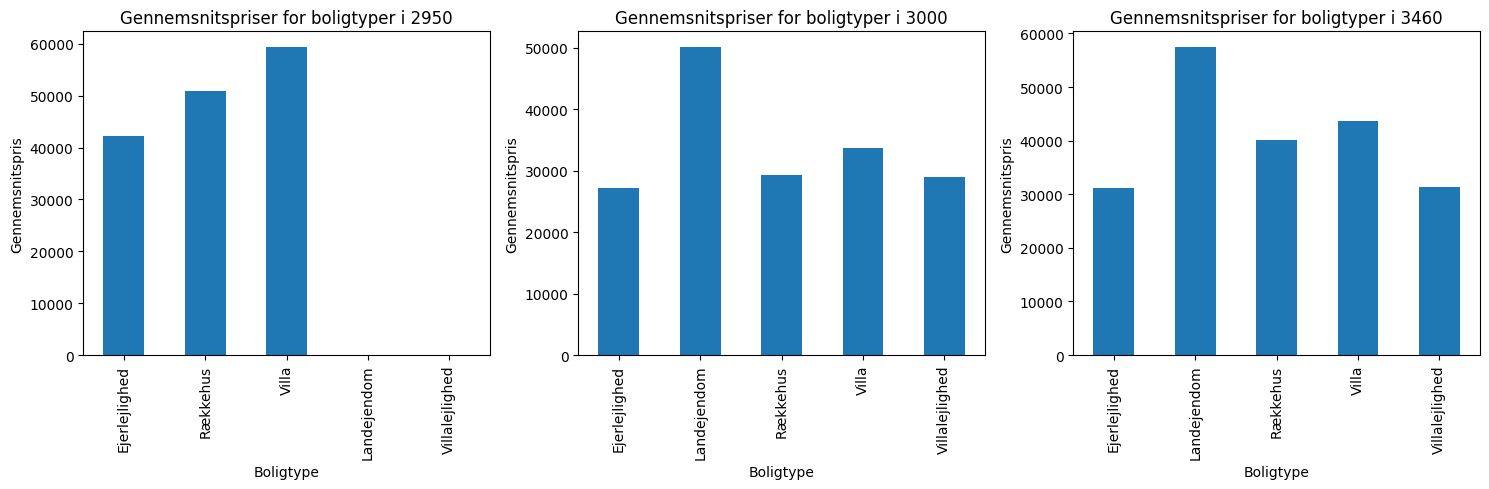

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for each city and type
averages = {}

# Set the number of plots per row
plots_per_row = 3

for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed' ,'Landejendom','Rækkehus', 'Villalejlighed', 'Villa']  # Alle mulige typer
    
    # Loop gennem alle typer og tjek om de findes i city_averages
    for typ in all_types:
        if typ not in city_averages.index:
            # Hvis typen mangler, sæt gennemsnitsprisen til 0
            city_averages[typ] = 0
    
    
    # Opret en ny figur og akse for hver by
    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))
    
    # Beregn række- og kolonneindeks for subplot
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    
    # Lav et bar plot af gennemsnitspriserne
    city_averages.plot(kind='bar', ax=axs[col_index])
    
    # Tilføj titel og labels til plottet
    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {city}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')
    
    # Vis plottet for den aktuelle by
    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()
        plt.show()


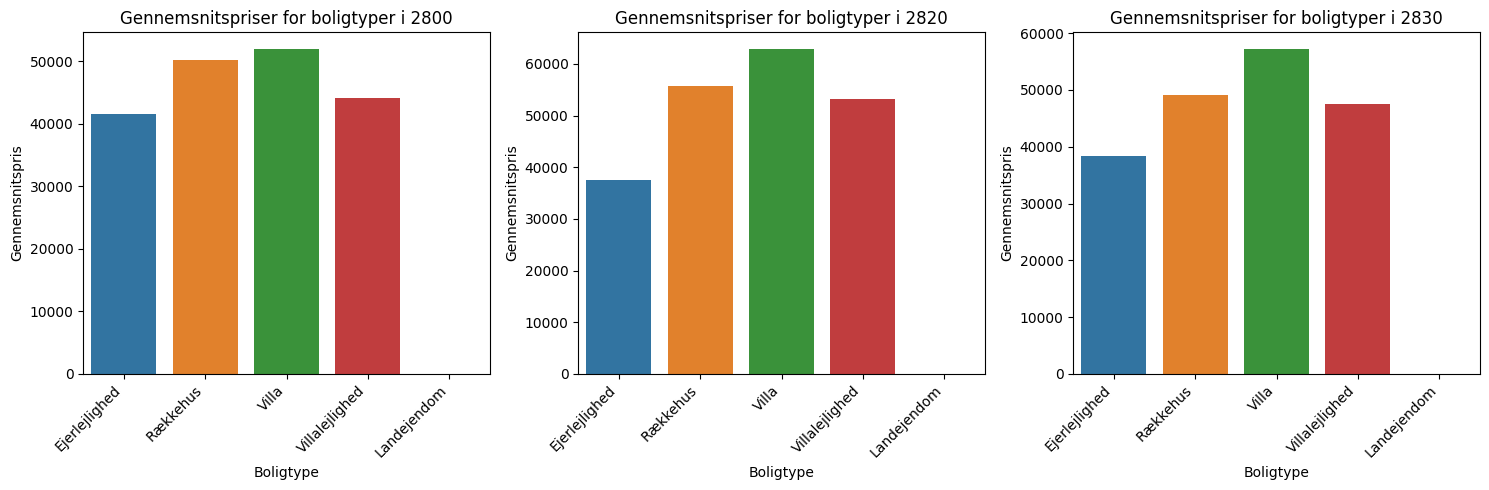

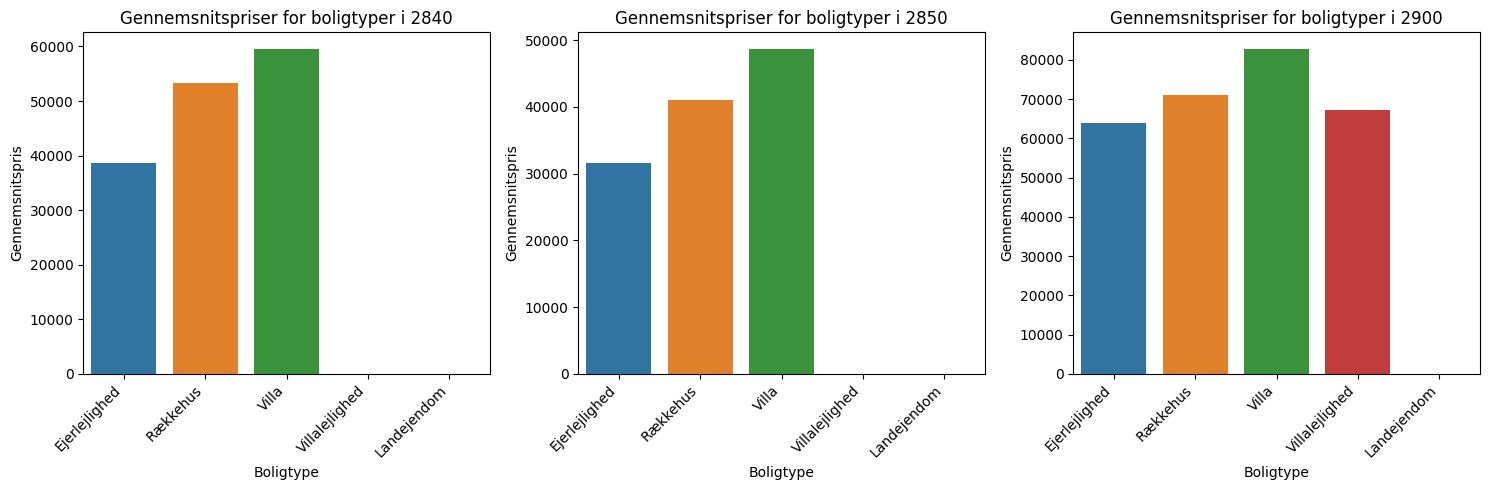

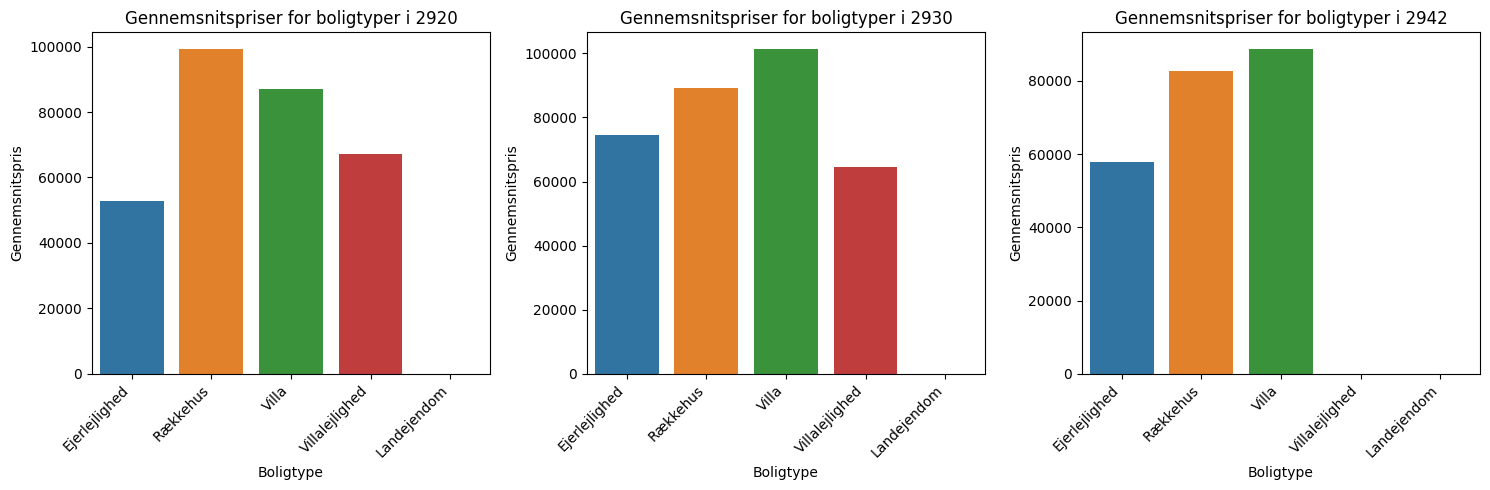

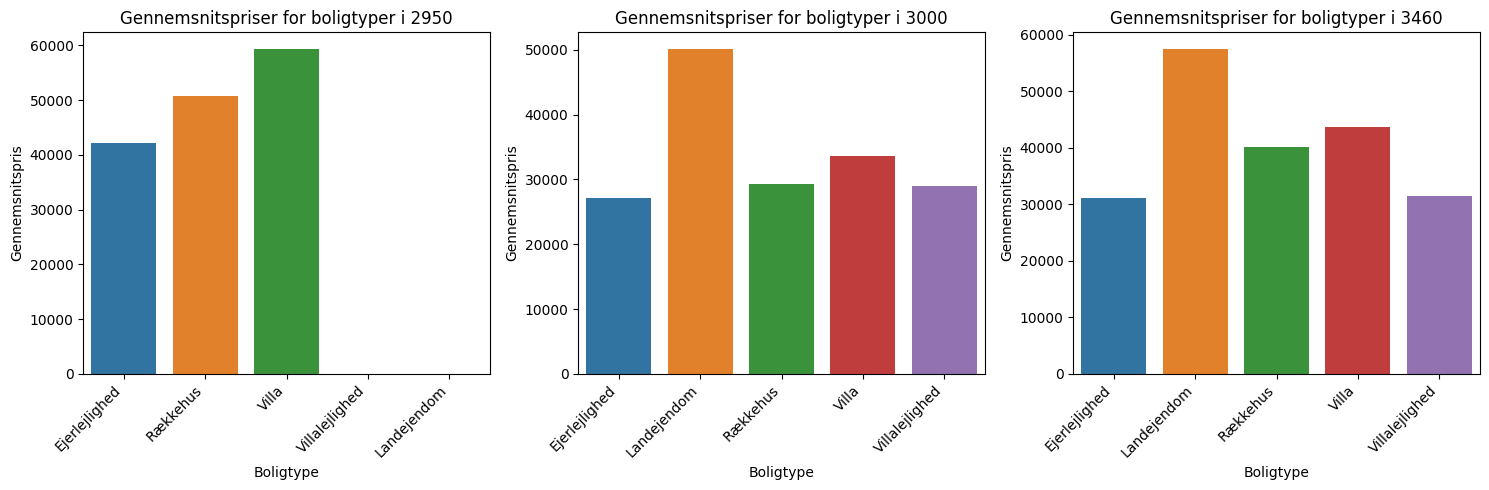

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for each city and type
averages = {}

# Set the number of plots per row
plots_per_row = 3

for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed', 'Rækkehus', 'Villalejlighed', 'Villa', 'Landejendom']  # Alle mulige typer
    
    # Loop through typer
    for typ in all_types:
        if typ not in city_averages.index:
            city_averages[typ] = 0
    

    # Create new figure and axix for each line of subplots
    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))
    
    # Calculate row- and coloumnindex for subplot
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    
    # Use Seaborn 
    sns.barplot(x=city_averages.index, y=city_averages.values, ax=axs[col_index])
    
    # Add title and labels to plot
    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {city}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')
    axs[col_index].set_xticklabels(axs[col_index].get_xticklabels(), rotation=45, ha='right')
    
    # Show plot for city
    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()
        plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Vis hele dataframe uden begrænsninger
pd.set_option("display.max_rows", None)  # Vis alle rækker

# Test om der er NaN-værdier i dataframe
is_nan = combined_df.isna().any().any()

# Check resultatet
if is_nan:
    print("Der er NaN-værdier i dataframe.")
else:
    print("Der er ingen NaN-værdier i dataframe.")

# Fjern rækker med NaN-værdier
combined_df = combined_df.dropna()

# Nulstil indekset i den opdaterede dataframe
combined_df = combined_df.reset_index(drop=True)

# Find rækker med NaN-værdier
nan_rows = combined_df[combined_df.isna().any(axis=1)]

#filterd = combined_df[combined_df['Y']<11.5]
#print(filterd)

# Udskriv indekserne for rækkerne med NaN-værdier
#print("Indekser for rækker med NaN-værdier:")
#print(nan_rows.index)

# Udskriv dataframe
#combined_df

# # Prepare your data
numerical_features = combined_df[['X', 'Y', 'Squaremeter price']]

# # Perform K-means clustering
 kmeans = KMeans(n_clusters=3)
 kmeans.fit(numerical_features)

# # Get the cluster assignments for each data point
 cluster_labels = kmeans.predict(numerical_features)

# # Add cluster labels as a new column in your dataframe
# combined_df["Cluster"] = cluster_labels

# # Visualize the clusters
# plt.scatter(combined_df["X"], combined_df["Y"], c=combined_df["Cluster"], s=50, cmap='viridis')
# plt.xlabel("x-koordinat")
# plt.ylabel("y-koordinat")
# plt.title("Klynger baseret på x,y-koordinater og kvadratmeterpris")

# # Add colorbar for cluster labels
# cbar = plt.colorbar()
# cbar.set_label("Klynge")

# # Show the plot
# plt.show()

Der er NaN-værdier i dataframe.
Empty DataFrame
Columns: [Address, X, Y, Price, Type, Size, Squaremeter price, Energy class, Url]
Index: []
Indekser for rækker med NaN-værdier:
Index([], dtype='int64')


Der er ingen NaN-værdier i dataframe.


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


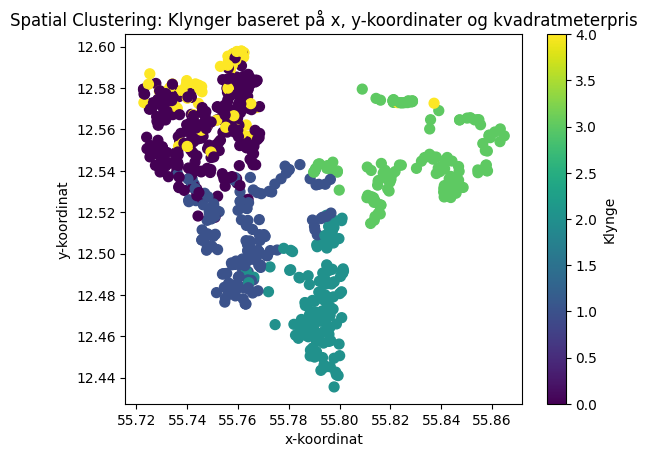

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
cities = ['2800', '2820', '2830', '2850', '2900', '2920',  '2942', '2950']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Vis hele dataframe uden begrænsninger
pd.set_option("display.max_rows", None)  # Vis alle rækker

# Test om der er NaN-værdier i dataframe
is_nan = combined_df.isna().any().any()

# Check resultatet
if is_nan:
    print("Der er NaN-værdier i dataframe.")
else:
    print("Der er ingen NaN-værdier i dataframe.")

# Fjern rækker med NaN-værdier
combined_df = combined_df.dropna()

# Nulstil indekset i den opdaterede dataframe
combined_df = combined_df.reset_index(drop=True)

# Find rækker med NaN-værdier
#nan_rows = combined_df[combined_df.isna().any(axis=1)]

# Udskriv indekserne for rækkerne med NaN-værdier
#print("Indekser for rækker med NaN-værdier:")
#print(nan_rows.index)

# Udskriv dataframe
#combined_df

# Prepare your data
numerical_features = combined_df[['X', 'Y', 'Squaremeter price']]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform Spatial Clustering using K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(numerical_features_scaled)

# Get the cluster assignments for each data point
cluster_labels = kmeans.predict(numerical_features_scaled)

# Add cluster labels as a new column in your dataframe
combined_df["Cluster"] = cluster_labels

# Visualize the clusters
plt.scatter(combined_df["X"], combined_df["Y"], c=combined_df["Cluster"], s=50, cmap='viridis')
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger baseret på x, y-koordinater og kvadratmeterpris")

# Add colorbar for cluster labels
cbar = plt.colorbar()
cbar.set_label("Klynge")

# Show the plot
plt.show()
